### Finance

In [4]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader("TSLA", "yahoo", start, end)
print(df.info())
df.head()

# note that it has DatetimeIndex!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1640 entries, 2010-06-29 to 2016-12-30
Data columns (total 6 columns):
High         1640 non-null float64
Low          1640 non-null float64
Open         1640 non-null float64
Close        1640 non-null float64
Volume       1640 non-null int64
Adj Close    1640 non-null float64
dtypes: float64(5), int64(1)
memory usage: 89.7 KB
None


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


### Resample

Resampling is necessary when you’re given a data set recorded in some time interval and you want to change the time interval to something else. A number of string aliases to useful common time series frequencies can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). It should be followed by an aggregate function.

"\<DataFrame or Series>.resample(arguments).\<aggregate function>"

In [14]:
df_volume = df["Volume"].resample("30D").sum()
df_volume

Date
2010-06-29     99486300
2010-07-29     15147200
2010-08-28     13181600
2010-09-27     11484700
2010-10-27     25457600
                ...    
2016-08-26     69413300
2016-09-25     75158200
2016-10-25    114148200
2016-11-24     84489300
2016-12-24     18385800
Freq: 30D, Name: Volume, Length: 80, dtype: int64

### Simple Moving Average (SMA)

It uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.


In [2]:
df["SMA_3"] = df["Close"].rolling(3).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,SMA_3
Date,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001,21.663333
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001,19.090000
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000,17.036667
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999,16.456667
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000,16.886666
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500,17.049999,17.303333


In [4]:
# to replace Nans in the first two rows

df["SMA_3"] = df["Close"].rolling(3, min_periods=0).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,SMA_3
Date,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001,21.663333
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001,19.090000
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000,17.036667
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999,16.456667
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000,16.886666
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500,17.049999,17.303333


### Cumulative Moving Average (CMA):

Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data.

In [6]:
df["CMA_3"] = df["Close"].expanding(3).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,SMA_3,CMA_3
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999,NaN,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000,NaN,NaN
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999,23.226666,23.226666
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001,21.663333,22.220000
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001,19.090000,20.998000
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000,17.036667,20.131667
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999,16.456667,19.750000
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000,16.886666,19.456250
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500,17.049999,17.303333,19.188889


### Exponential Moving Average (EMA)

Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way.

EMA's reaction is directly proportional to the pattern of the data.
Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

In [8]:
df["EMA_3"] = df["Close"].ewm(3).mean()
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,SMA_3,CMA_3,EMA_3
Date,,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999,NaN,NaN,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000,NaN,NaN,23.855714
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999,23.226666,23.226666,23.035945
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001,21.663333,22.220000,21.633086
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001,19.090000,20.998000,19.822702
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000,17.036667,20.131667,18.599284
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999,16.456667,19.750000,18.270587
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000,16.886666,19.456250,18.028727
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500,17.049999,17.303333,19.188889,17.764182


### Resampling, Shifting, and Windowing

In [10]:
goog = web.DataReader('GOOG', start='2010', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956


* For simplicity, we’ll use just the closing price:

In [11]:
goog = goog['Close']

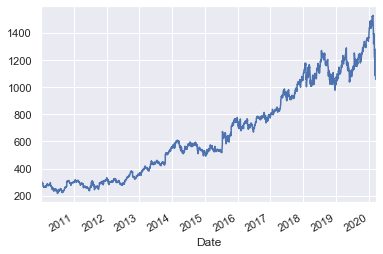

In [12]:
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

goog.plot();

#### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
You can do this using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

Taking a look at the Google closing price, let’s compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

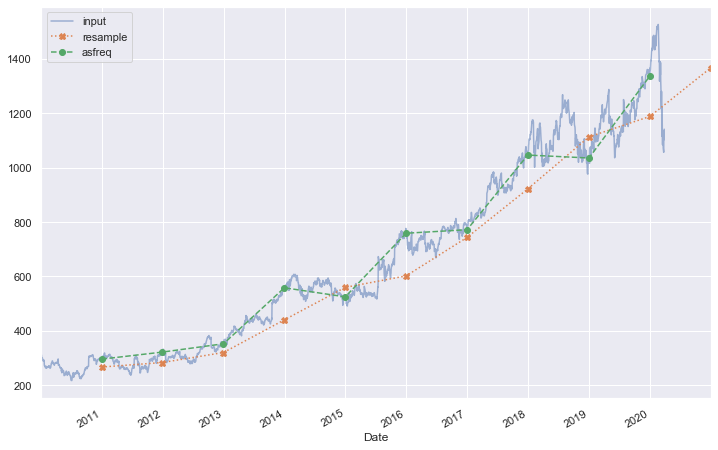

In [20]:
goog.plot(alpha=0.5, style='-', figsize=(12,8))
goog.resample('BA').mean().plot(style=':', marker="X")
goog.asfreq('BA').plot(style='--', marker="o");
plt.legend(['input', 'resample', 'asfreq'],
            loc='upper left')

plt.show()

* ***Notice the difference: at each point, resample reports the average of the previous year,
while asfreq reports the value at the end of the year.***

* For up-sampling, `resample()` and `asfreq()` are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty—that is, filled with NA values. Just as with the `pd.fillna()` function, `asfreq()` accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends)

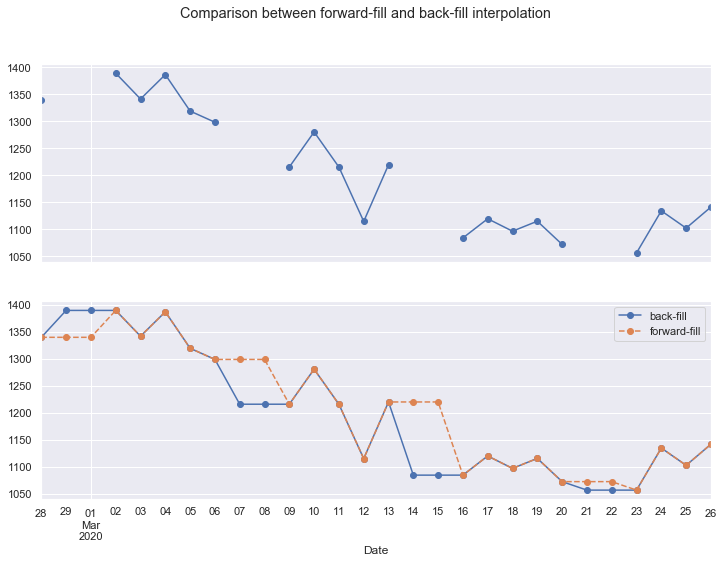

In [42]:
fig, ax = plt.subplots(2, sharex=True, figsize=(12,8))

data = goog.iloc[-20:]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

fig.suptitle('Comparison between forward-fill and back-fill interpolation')

ax[1].legend(["back-fill", "forward-fill"]);

* The top panel is the default: non-business days are left as NA values and do not
appear on the plot. The bottom panel shows the differences between two strategies
for filling the gaps: forward-filling and backward-filling.

#### Time-shifts

Another common time series–specific operation is shifting of data in time. Pandas
has two closely related methods for computing this: `shift()` and `tshift()`. In short,
the difference between them is that `shift()` shifts the data, while `tshift()` shifts the
index. In both cases, the shift is specified in multiples of the frequency.

* we use shifted values to compute the one-year return on investment for
Google stock over the course of the dataset

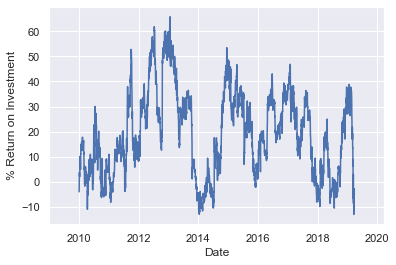

In [48]:
# apply a frequency to the data
goog = goog.asfreq('D', method='ffill')

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows
Rolling statistics are a third type of time series–specific operation implemented by
Pandas. These can be accomplished via the `rolling()` attribute of Series and Data
Frame objects, which returns a view similar to what we saw with the groupby operation.
 This rolling view makes available a number of aggregation operations by default.
 
For example, here is the one-year centered rolling mean and standard deviation of the
Google stock prices.

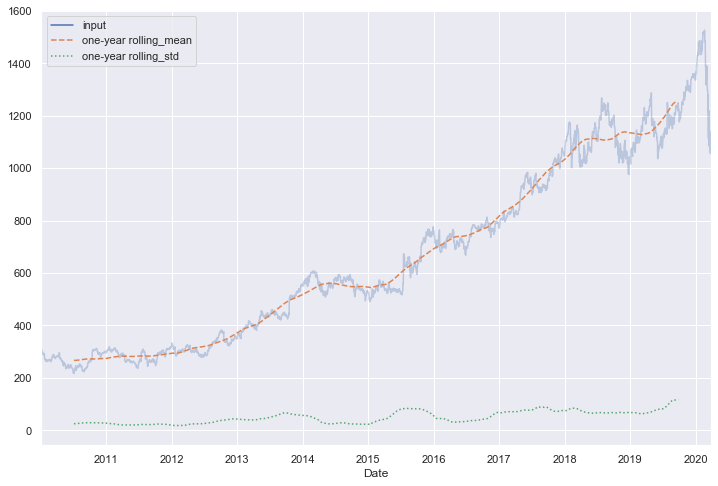

In [51]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(12,8))
ax.lines[0].set_alpha(0.3)